In [2]:
import pandas as pd

In [3]:
#como parte do tratamento de dados foi necessário identificar que a codifição do arquivo não era o padrão do método read do pandas
microdados_df = pd.read_csv('MICRODADOS_ENEM_2023.csv', encoding='ISO-8859-1', sep=';')
itens_prova_df = pd.read_csv('ITENS_PROVA_2023.csv', encoding='ISO-8859-1', sep=';')

PRINCIPAIS CARACTERISTICAS DO DATASET

In [4]:
microdados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24260 entries, 0 to 24259
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            24260 non-null  int64  
 1   NU_ANO                  24260 non-null  int64  
 2   TP_FAIXA_ETARIA         24260 non-null  int64  
 3   TP_SEXO                 24260 non-null  object 
 4   TP_ESTADO_CIVIL         24260 non-null  int64  
 5   TP_COR_RACA             24260 non-null  int64  
 6   TP_NACIONALIDADE        24260 non-null  int64  
 7   TP_ST_CONCLUSAO         24260 non-null  int64  
 8   TP_ANO_CONCLUIU         24260 non-null  int64  
 9   TP_ESCOLA               24260 non-null  int64  
 10  TP_ENSINO               7893 non-null   float64
 11  IN_TREINEIRO            24260 non-null  int64  
 12  CO_MUNICIPIO_ESC        4546 non-null   float64
 13  NO_MUNICIPIO_ESC        4546 non-null   object 
 14  CO_UF_ESC               4546 non-null 

In [ ]:
itens_prova_df.info()

PADRÕES OU TENDENCIAS


In [ ]:
# Estatísticas descritivas para as variáveis numéricas
microdados_df.describe()


In [ ]:
# Verificar a quantidade de valores ausentes
microdados_df.isnull().sum()


In [ ]:
# Verificar valores ausentes em todas as colunas Q001 até Q025
questoes_columns = [f'Q{i:03}' for i in range(1, 26)]  # Cria a lista de Q001 a Q025
missing_questoes = microdados_df[questoes_columns].isnull().sum()
missing_questoes


Os dados indicam que somente uma pessoa deixou o questionário socio economico em branco


In [ ]:
# Mostrar todas as linhas que têm pelo menos um valor ausente nas colunas Q001 até Q025
missing_responses_all = microdados_df[microdados_df[questoes_columns].isnull().any(axis=1)]
missing_responses_all

#esse passo evidencia que o dataset foi provavelmente preparado previamente


BUSCA DE TENDENCIAS


In [ ]:
# Distribuição do sexo
sexo_distribuicao = microdados_df['TP_SEXO'].value_counts()
print("Distribuição de Sexo:")
print(sexo_distribuicao)


sexo_distribuicao.plot(kind='bar', figsize=(8, 5), title='Distribuição de Sexo', xlabel='Sexo', ylabel='Quantidade de Inscritos')


In [ ]:
# Distribuição da faixa etária
faixa_etaria_distribuicao = microdados_df['TP_FAIXA_ETARIA'].value_counts()
print("Distribuição da Faixa Etária:")
print(faixa_etaria_distribuicao)


faixa_etaria_distribuicao.plot(kind='bar', figsize=(8, 5), title='Distribuição da Faixa Etária', xlabel='Faixa Etária', ylabel='Quantidade de Inscritos')


In [ ]:
# Distribuição de respostas para a questão Q001
q001_distribuicao = microdados_df['Q001'].value_counts()
print("Distribuição das Respostas para Q001:")
print(q001_distribuicao)

# Gráfico de barras
q001_distribuicao.plot(kind='bar', figsize=(8, 5), title='Distribuição das Respostas para Q001', xlabel='Resposta', ylabel='Quantidade de Inscritos')


Qual a distribuição das notas das provas por Estado (UF) e por componente?

In [ ]:
notas_por_estado = microdados_df.groupby('SG_UF_PROVA')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean()

In [ ]:
print(notas_por_estado.head())


             NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT
SG_UF_PROVA                                                
AC           472.498305  510.426029  506.493971  483.710015
AL           477.502369  508.087174  502.458579  505.839038
AM           474.100000  499.896315  499.530067  485.071232
AP           474.890830  507.989875  504.479332  482.657096
BA           481.293984  514.489612  506.948569  501.196094


In [ ]:
!pip install matplotlib

In [8]:
import matplotlib.pyplot as plt

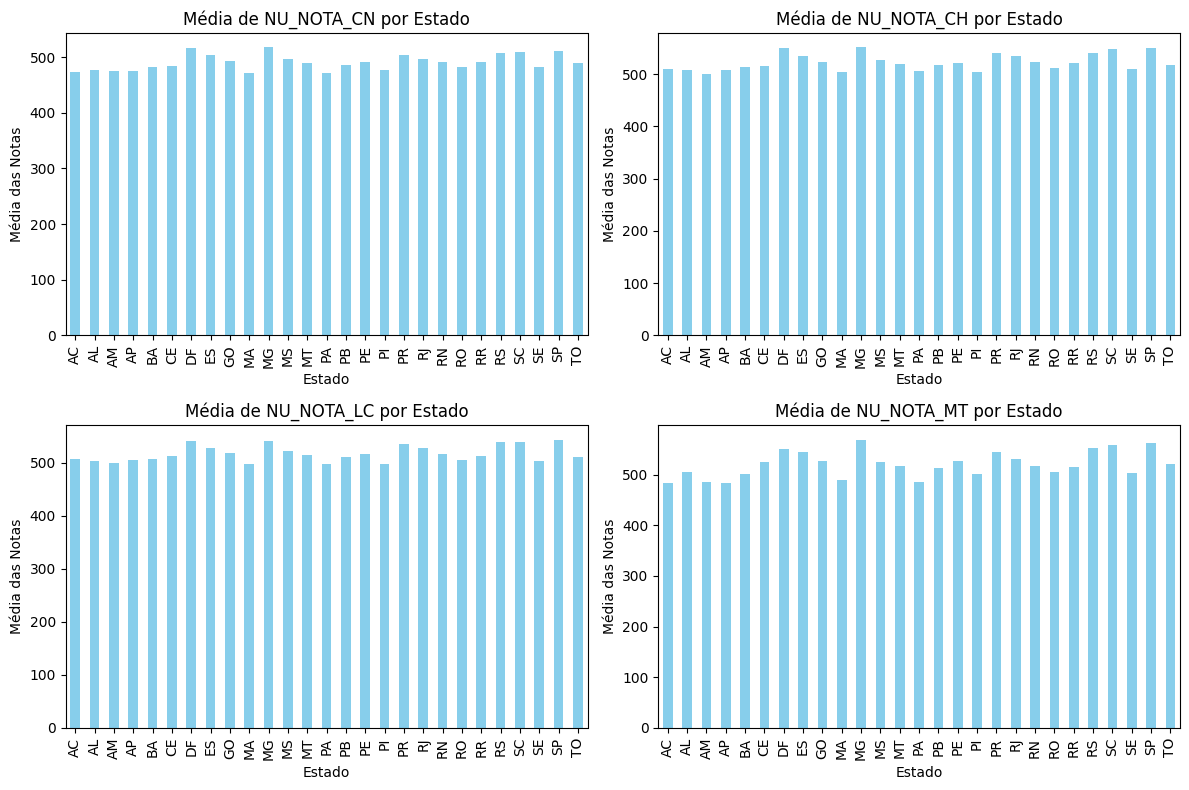

In [ ]:
plt.figure(figsize=(12, 6))

# Criar gráficos para cada componente
for i, componente in enumerate(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']):
    plt.subplot(2, 2, i+1)
    notas_por_estado[componente].plot(kind='bar', color='skyblue', figsize=(12, 8))
    plt.title(f'Média de {componente} por Estado')
    plt.xlabel('Estado')
    plt.ylabel('Média das Notas')
    plt.xticks(rotation=90)

# Ajustar o layout
plt.tight_layout()
plt.show()

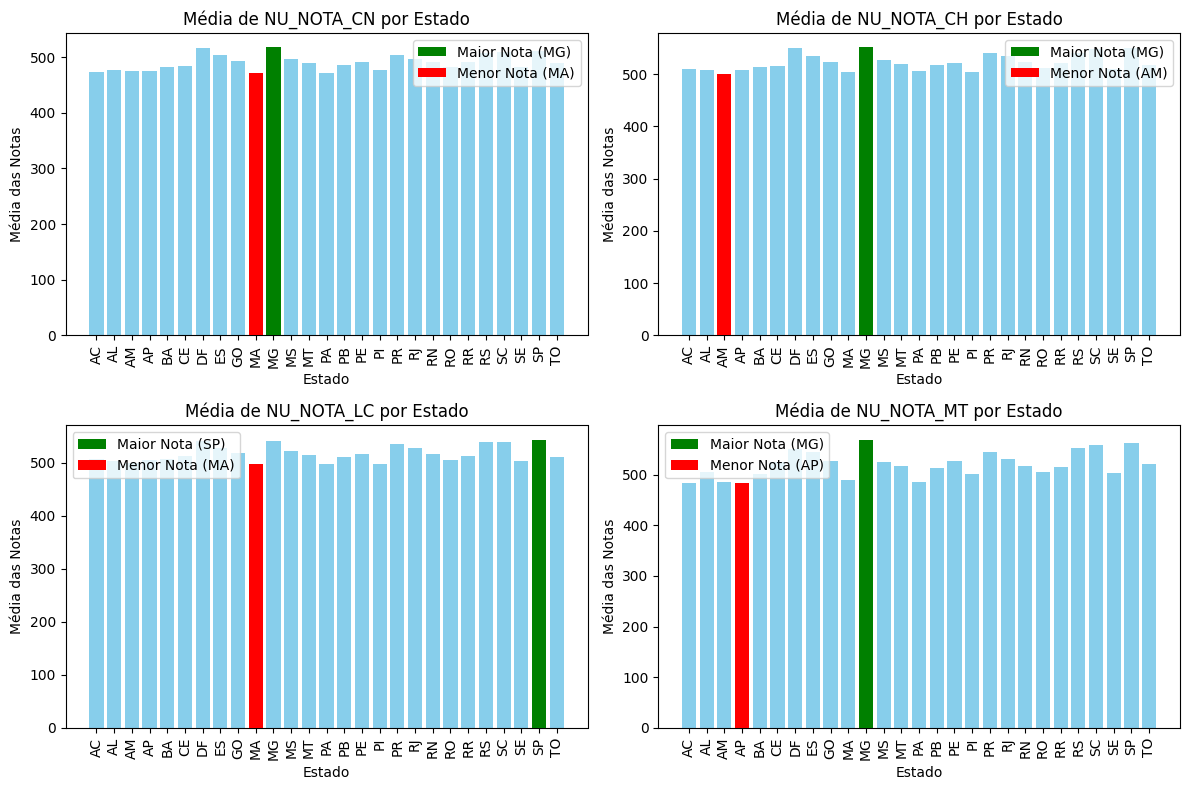

In [ ]:
# Função para pintar os Estados com as maiores e menores notas
def plot_com_destaques(componente, notas_por_estado):
    # Encontrar o Estado com a maior e menor média de nota para o componente
    max_estado = notas_por_estado[componente].idxmax()
    min_estado = notas_por_estado[componente].idxmin()

    # Plotar gráfico de barras
    plt.bar(notas_por_estado.index, notas_por_estado[componente], color='skyblue')

    # Destacar o Estado com a maior e menor nota
    plt.bar(max_estado, notas_por_estado[componente].loc[max_estado], color='green', label=f'Maior Nota ({max_estado})', zorder=5)
    plt.bar(min_estado, notas_por_estado[componente].loc[min_estado], color='red', label=f'Menor Nota ({min_estado})', zorder=5)

    # Títulos e rótulos
    plt.title(f'Média de {componente} por Estado')
    plt.xlabel('Estado')
    plt.ylabel('Média das Notas')
    plt.xticks(rotation=90)
    plt.legend()

# Criar os gráficos para cada componente
plt.figure(figsize=(12, 8))

# Gráfico para cada componente (CN, CH, LC, MT)
for i, componente in enumerate(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']):
    plt.subplot(2, 2, i+1)
    plot_com_destaques(componente, notas_por_estado)

# Ajustar o layout
plt.tight_layout()
plt.show()

Qual é o impacto do tipo de língua escolhida (língua estrangeira) no desempenho?

In [ ]:
lingua_media = microdados_df.groupby('TP_LINGUA')['NU_NOTA_LC'].mean()


In [ ]:
lingua_media

,NU_NOTA_LC
TP_LINGUA,
0,535.983728
1,501.752968


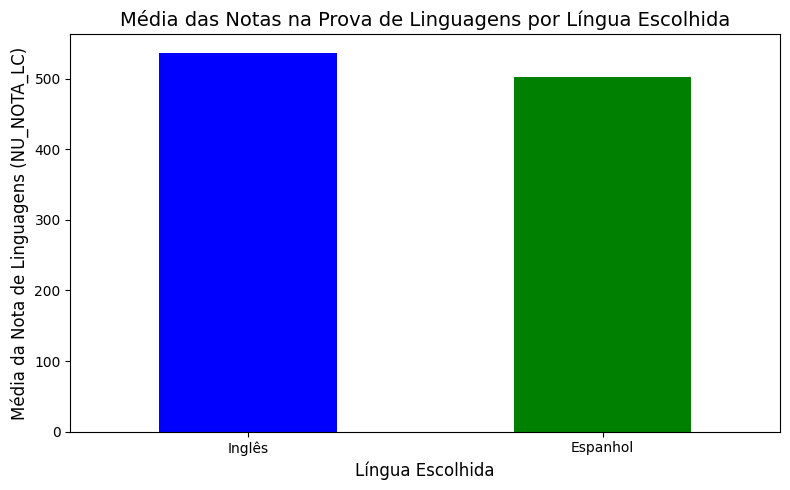

In [ ]:
lingua_media.index = lingua_media.index.map({0: 'Inglês', 1: 'Espanhol'})

# Criando o gráfico
plt.figure(figsize=(8, 5))
lingua_media.plot(kind='bar', color=['blue', 'green'])

# Títulos e labels
plt.title('Média das Notas na Prova de Linguagens por Língua Escolhida', fontsize=14)
plt.xlabel('Língua Escolhida', fontsize=12)
plt.ylabel('Média da Nota de Linguagens (NU_NOTA_LC)', fontsize=12)
plt.xticks(rotation=0)  # Para os rótulos ficarem horizontais
plt.tight_layout()

# Exibindo o gráfico
plt.show()

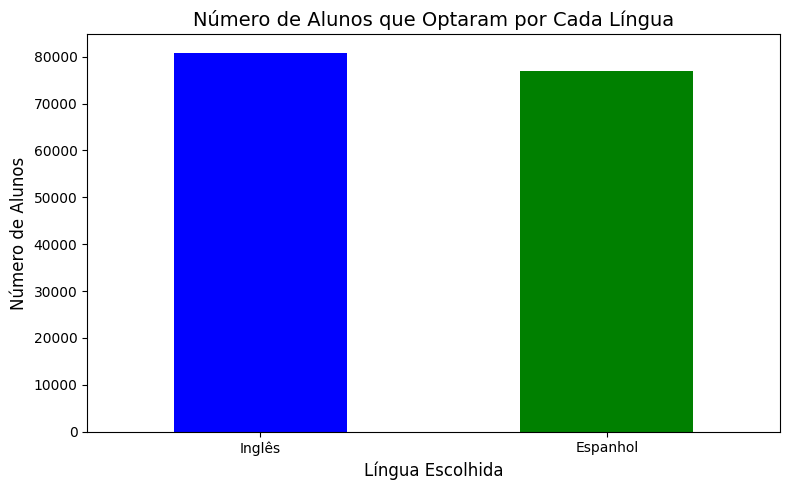

In [ ]:
# Contagem de alunos por língua (0 = Inglês, 1 = Espanhol)
lingua_contagem = microdados_df['TP_LINGUA'].value_counts()

# Mapeando os valores de TP_LINGUA (0 = Inglês, 1 = Espanhol)
lingua_contagem.index = lingua_contagem.index.map({0: 'Inglês', 1: 'Espanhol'})

# Criando o gráfico
plt.figure(figsize=(8, 5))
lingua_contagem.plot(kind='bar', color=['blue', 'green'])

# Títulos e labels
plt.title('Número de Alunos que Optaram por Cada Língua', fontsize=14)
plt.xlabel('Língua Escolhida', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)
plt.xticks(rotation=0)  # Para os rótulos ficarem horizontais
plt.tight_layout()

# Exibindo o gráfico
plt.show()


In [ ]:
#quem escolhe a prova de inglês tem uma média maior. Porém, a maior parte dos alunos opta por ingles.

In [ ]:
# Primeiro, selecionamos apenas as colunas relevantes (as notas das provas)
areas_provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']

# Agrupar por TP_LINGUA e calcular a média de cada área para cada língua
media_areas = microdados_df.groupby('TP_LINGUA')[areas_provas].mean()

# Calcular a média geral para cada língua (média de todas as áreas)
media_geral = media_areas.mean(axis=1)

# Mapeando os valores de TP_LINGUA (0 = Inglês, 1 = Espanhol)
media_geral.index = media_geral.index.map({0: 'Inglês', 1: 'Espanhol'})

# Exibir as médias gerais para cada língua
print(media_geral)

TP_LINGUA
Inglês      536.254565
Espanhol    493.854641
dtype: float64


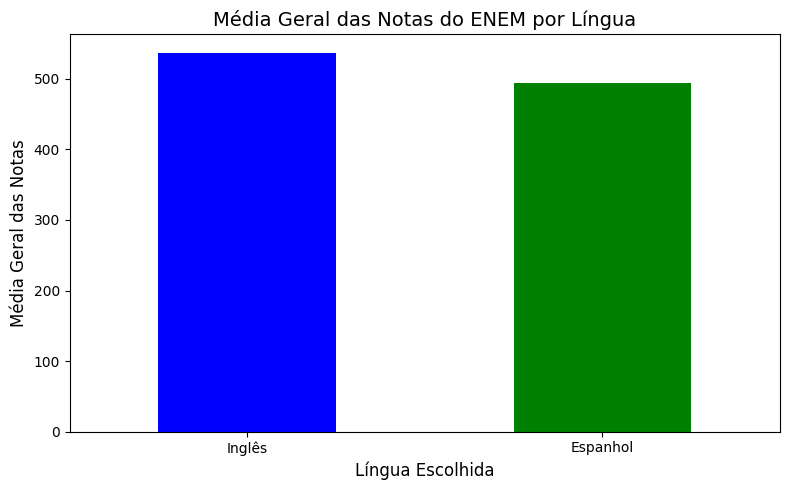

In [ ]:
# Criando o gráfico de barras para a média geral de cada língua
plt.figure(figsize=(8, 5))
media_geral.plot(kind='bar', color=['blue', 'green'])

# Títulos e labels
plt.title('Média Geral das Notas do ENEM por Língua', fontsize=14)
plt.xlabel('Língua Escolhida', fontsize=12)
plt.ylabel('Média Geral das Notas', fontsize=12)
plt.xticks(rotation=0)  # Para os rótulos ficarem horizontais
plt.tight_layout()

# Exibindo o gráfico
plt.show()

COMO FATORES SOCIAIS INFLUENCIAM NA NOTA?



> Adicionar aspas



Q003
C    39184
B    36289
A    28768
D    23545
F    23184
E     6664
Name: count, dtype: int64


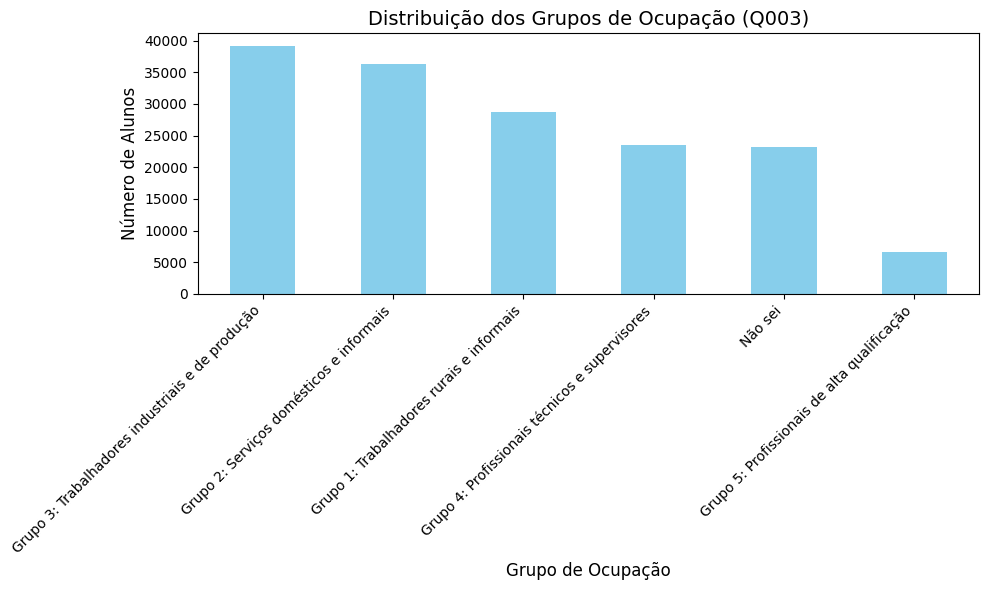

In [ ]:
# Contar a quantidade de alunos em cada grupo de Q003
grupo_q003_contagem = microdados_df['Q003'].value_counts()

# Exibir a contagem de alunos por grupo
print(grupo_q003_contagem)

# Se desejar, mapeando as categorias para os grupos
mapa_grupos = {
    'A': 'Grupo 1: Trabalhadores rurais e informais',
    'B': 'Grupo 2: Serviços domésticos e informais',
    'C': 'Grupo 3: Trabalhadores industriais e de produção',
    'D': 'Grupo 4: Profissionais técnicos e supervisores',
    'E': 'Grupo 5: Profissionais de alta qualificação',
    'F': 'Não sei'
}

# Substituindo os valores de Q003 pelos nomes dos grupos
microdados_df['Q003_descritivo'] = microdados_df['Q003'].map(mapa_grupos)

# Contando novamente com a descrição dos grupos
grupo_q003_contagem_descritivo = microdados_df['Q003_descritivo'].value_counts()

# Exibir o gráfico de barras
grupo_q003_contagem_descritivo.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Distribuição dos Grupos de Ocupação (Q003)', fontsize=14)
plt.xlabel('Grupo de Ocupação', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


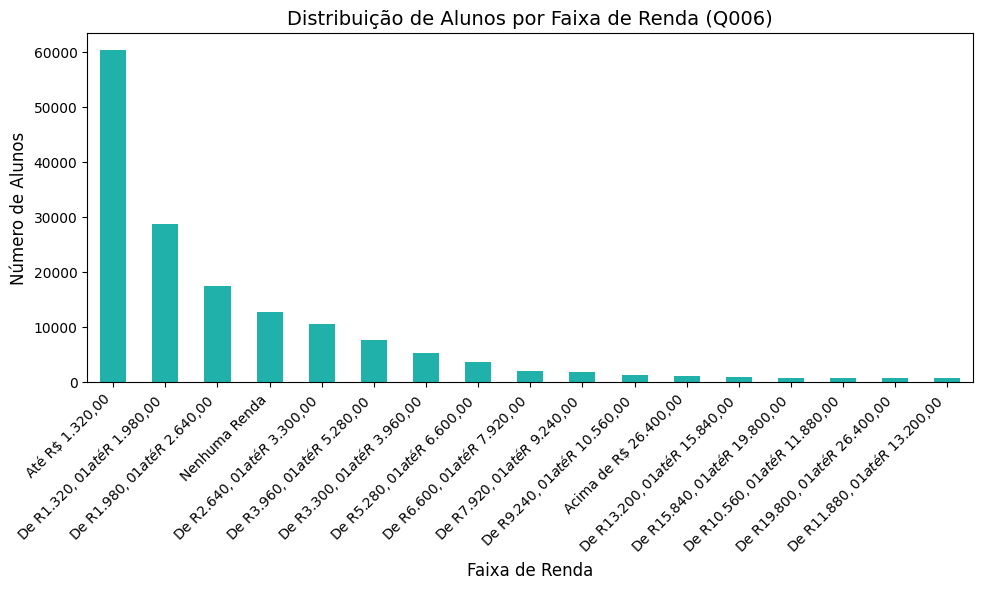

In [ ]:
# Contar a quantidade de alunos em cada faixa de renda (Q006)
distribuicao_renda = microdados_df['Q006'].value_counts()

# Mapeando os valores de Q006 para os nomes das faixas de renda
mapa_renda = {
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1.320,00',
    'C': 'De R$ 1.320,01 até R$ 1.980,00',
    'D': 'De R$ 1.980,01 até R$ 2.640,00',
    'E': 'De R$ 2.640,01 até R$ 3.300,00',
    'F': 'De R$ 3.300,01 até R$ 3.960,00',
    'G': 'De R$ 3.960,01 até R$ 5.280,00',
    'H': 'De R$ 5.280,01 até R$ 6.600,00',
    'I': 'De R$ 6.600,01 até R$ 7.920,00',
    'J': 'De R$ 7.920,01 até R$ 9.240,00',
    'K': 'De R$ 9.240,01 até R$ 10.560,00',
    'L': 'De R$ 10.560,01 até R$ 11.880,00',
    'M': 'De R$ 11.880,01 até R$ 13.200,00',
    'N': 'De R$ 13.200,01 até R$ 15.840,00',
    'O': 'De R$ 15.840,01 até R$ 19.800,00',
    'P': 'De R$ 19.800,01 até R$ 26.400,00',
    'Q': 'Acima de R$ 26.400,00'
}

# Substituindo os valores de Q006 pelos nomes das faixas de renda
microdados_df['Q006_descritivo'] = microdados_df['Q006'].map(mapa_renda)

# Contando novamente com a descrição das faixas de renda
distribuicao_renda_descritivo = microdados_df['Q006_descritivo'].value_counts()

# Ordenando pela frequência (opcional, para que o gráfico fique mais claro)
distribuicao_renda_descritivo = distribuicao_renda_descritivo.sort_values(ascending=False)

# Criando o gráfico de barras
distribuicao_renda_descritivo.plot(kind='bar', color='lightseagreen', figsize=(10, 6))
plt.title('Distribuição de Alunos por Faixa de Renda (Q006)', fontsize=14)
plt.xlabel('Faixa de Renda', fontsize=12)
plt.ylabel('Número de Alunos', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Q006
Nenhuma Renda                       478.709751
Até R$ 1.320,00                     498.172793
De R$ 1.320,01 até R$ 1.980,00      519.406852
De R$ 1.980,01 até R$ 2.640,00      529.087859
De R$ 2.640,01 até R$ 3.300,00      539.417928
De R$ 3.300,01 até R$ 3.960,00      547.695892
De R$ 3.960,01 até R$ 5.280,00      555.004517
De R$ 5.280,01 até R$ 6.600,00      564.829029
De R$ 6.600,01 até R$ 7.920,00      570.260043
De R$ 7.920,01 até R$ 9.240,00      575.552584
De R$ 9.240,01 até R$ 10.560,00     575.647054
De R$ 10.560,01 até R$ 11.880,00    583.563889
De R$ 11.880,01 até R$ 13.200,00    585.548472
De R$ 13.200,01 até R$ 15.840,00    587.047917
De R$ 15.840,01 até R$ 19.800,00    585.848759
De R$ 19.800,01 até R$ 26.400,00    598.562865
Acima de R$ 26.400,00               592.669543
Name: NU_NOTA_LC, dtype: float64


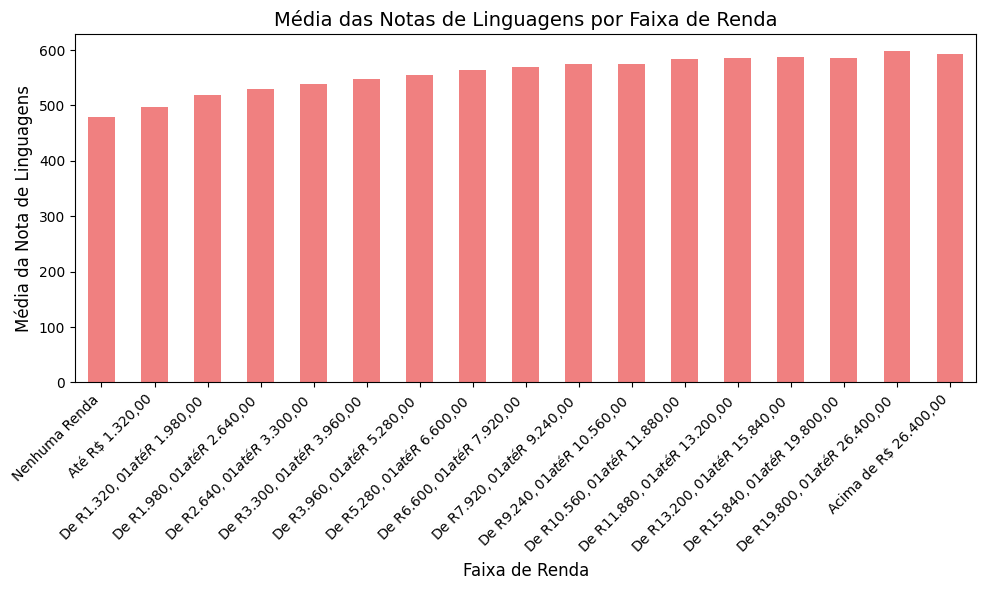

In [ ]:
# Calcular a média das notas de Linguagens por faixa de renda (Q006)
media_notas_renda = microdados_df.groupby('Q006')['NU_NOTA_LC'].mean()

# Mapeando as faixas de renda para seus descritores
media_notas_renda.index = media_notas_renda.index.map(mapa_renda)

# Exibindo a média das notas por faixa de renda
print(media_notas_renda)

# Gráfico de barras para visualizar a média das notas de Linguagens por faixa de renda
media_notas_renda.plot(kind='bar', color='lightcoral', figsize=(10, 6))
plt.title('Média das Notas de Linguagens por Faixa de Renda', fontsize=14)
plt.xlabel('Faixa de Renda', fontsize=12)
plt.ylabel('Média da Nota de Linguagens', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


AS FAIXAS DE MAIOR RENDA TEM NOTAS MAIORES - POREM A DIFERENÇA PODE SER MENOS ACENTUADA DOQ O SENSO COMUM ACREDITA. OQ INDICA QUE A EDUCAÇÃO NO PAÍS TEM DEFICIENCIAS GENERALIZADAS A TODAS AS CLASSES

EXISTE RELAÇÃO ENTRE ESCOLHA DE LINGUA E SITUAÇÃO SOCIO-ECONOMICA?


<Figure size 1000x600 with 0 Axes>

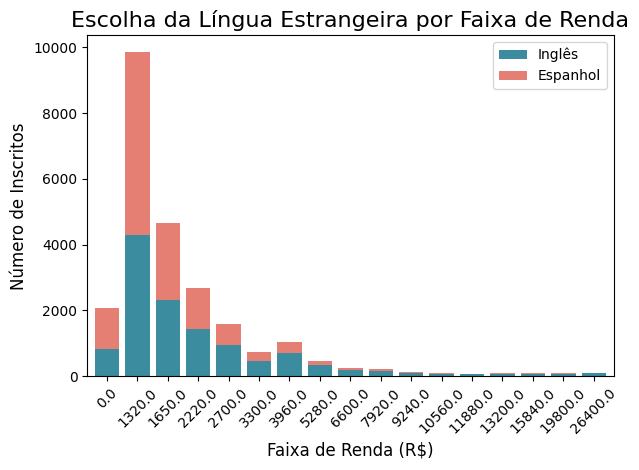

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Mapear as faixas de renda para valores numéricos
renda_map = {
    'A': 0, 'B': 1320, 'C': 1650, 'D': 2220, 'E': 2700, 'F': 3300,
    'G': 3960, 'H': 5280, 'I': 6600, 'J': 7920, 'K': 9240, 'L': 10560,
    'M': 11880, 'N': 13200, 'O': 15840, 'P': 19800, 'Q': 26400
}

# 2. Substituir a coluna Q006 pelas faixas de renda numéricas
microdados_df['Renda'] = microdados_df['Q006'].map(renda_map)

# 3. Agrupar os dados pela renda e pela língua estrangeira (TP_LINGUA)
# Considerando TP_LINGUA = 1 para Inglês e 2 para Espanhol
lingua_counts = microdados_df.groupby(['Renda', 'TP_LINGUA']).size().unstack(fill_value=0)

# 4. Visualização - Gráfico de barras
plt.figure(figsize=(10, 6))
lingua_counts.plot(kind='bar', stacked=True, color=['#3b8c9f', '#e57e73'], width=0.8)
plt.title('Escolha da Língua Estrangeira por Faixa de Renda', fontsize=16)
plt.xlabel('Faixa de Renda (R$)', fontsize=12)
plt.ylabel('Número de Inscritos', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Inglês', 'Espanhol'])
plt.tight_layout()
plt.show()


Rendas mais baixas optam pelo espanhol, isso pode ser mais uma justificativa para alunos do espanhol terem uma média geral menor nas provas. Considerando que o fator socio economico também induz o resultado

Como o estado civil dos alunos (variável Q002) influencia o desempenho nas provas do ENEM?

<ipython-input-15-a61341d90cb3>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_notas.index, y=media_notas['NU_NOTA_CN'], palette="viridis")
<ipython-input-15-a61341d90cb3>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_notas.index, y=media_notas['NU_NOTA_MT'], palette="viridis")
<ipython-input-15-a61341d90cb3>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_notas.index, y=media_notas['NU_NOTA_REDACAO'], palette="viridis")


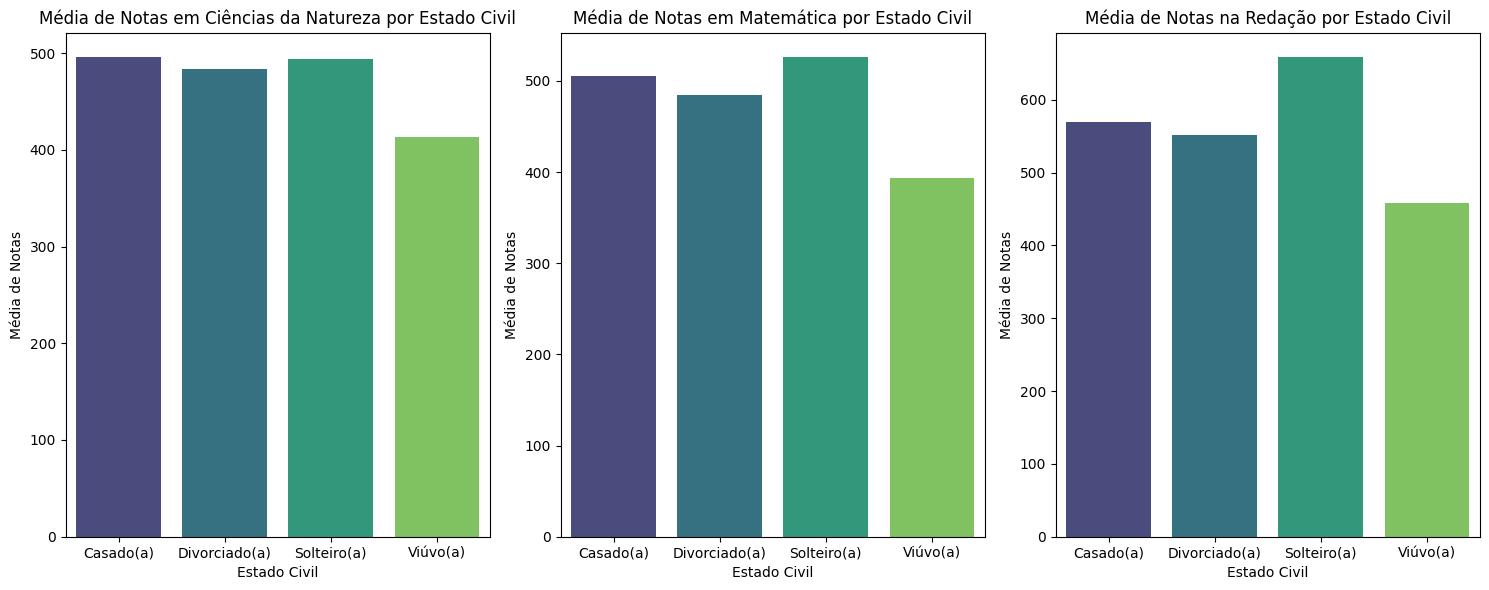

Resultado ANOVA para Ciências da Natureza: nan
Resultado ANOVA para Matemática: nan
Resultado ANOVA para Redação: nan


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Mapear os estados civis para categorias
estado_civil_map = {
    1: 'Solteiro(a)',
    2: 'Casado(a)',
    3: 'Divorciado(a)',
    4: 'Viúvo(a)',
    5: 'Outro'
}

# Substituir a coluna TP_ESTADO_CIVIL pelas categorias
microdados_df['Estado Civil'] = microdados_df['TP_ESTADO_CIVIL'].map(estado_civil_map)

# 2. Filtrando as colunas relevantes para a análise
df_estado_civil = microdados_df[['Estado Civil', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

# 3. Calcular a média das notas para cada grupo de estado civil
media_notas = df_estado_civil.groupby('Estado Civil').mean()

# 4. Plotar gráficos de barras para cada área do ENEM
plt.figure(figsize=(15, 6))

# Gráfico de barras para Ciências da Natureza
plt.subplot(1, 3, 1)
sns.barplot(x=media_notas.index, y=media_notas['NU_NOTA_CN'], palette="viridis")
plt.title('Média de Notas em Ciências da Natureza por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Média de Notas')

# Gráfico de barras para Matemática
plt.subplot(1, 3, 2)
sns.barplot(x=media_notas.index, y=media_notas['NU_NOTA_MT'], palette="viridis")
plt.title('Média de Notas em Matemática por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Média de Notas')

# Gráfico de barras para Redação
plt.subplot(1, 3, 3)
sns.barplot(x=media_notas.index, y=media_notas['NU_NOTA_REDACAO'], palette="viridis")
plt.title('Média de Notas na Redação por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Média de Notas')

plt.tight_layout()
plt.show()

# 5. Teste estatístico (ANOVA) para verificar diferenças significativas nas notas
anova_cn = stats.f_oneway(
    df_estado_civil[df_estado_civil['Estado Civil'] == 'Solteiro(a)']['NU_NOTA_CN'],
    df_estado_civil[df_estado_civil['Estado Civil'] == 'Casado(a)']['NU_NOTA_CN'],
    df_estado_civil[df_estado_civil['Estado Civil'] == 'Divorciado(a)']['NU_NOTA_CN'],
    df_estado_civil[df_estado_civil['Estado Civil'] == 'Viúvo(a)']['NU_NOTA_CN'],
    df_estado_civil[df_estado_civil['Estado Civil'] == 'Outro']['NU_NOTA_CN']
)

anova_mt = stats.f_oneway(
    df_estado_civil[df_estado_civil['Estado Civil'] == 'Solteiro(a)']['NU_NOTA_MT'],
    df_estado_civil[df_estado_civil['Estado Civil'] == 'Casado(a)']['NU_NOTA_MT'],
    df_estado_civil[df_estado_civil['Estado Civil'] == 'Divorciado(a)']['NU_NOTA_MT'],
    df_estado_civil[df_estado_civil['Estado Civil'] == 'Viúvo(a)']['NU_NOTA_MT'],
    df_estado_civil[df_estado_civil['Estado Civil'] == 'Outro']['NU_NOTA_MT']
)

anova_redacao = stats.f_oneway(
    df_estado_civil[df_estado_civil['Estado Civil'] == 'Solteiro(a)']['NU_NOTA_REDACAO'],
    df_estado_civil[df_estado_civil['Estado Civil'] == 'Casado(a)']['NU_NOTA_REDACAO'],
    df_estado_civil[df_estado_civil['Estado Civil'] == 'Divorciado(a)']['NU_NOTA_REDACAO'],
    df_estado_civil[df_estado_civil['Estado Civil'] == 'Viúvo(a)']['NU_NOTA_REDACAO'],
    df_estado_civil[df_estado_civil['Estado Civil'] == 'Outro']['NU_NOTA_REDACAO']
)

# 6. Resultados do teste ANOVA
print(f"Resultado ANOVA para Ciências da Natureza: {anova_cn.pvalue}")
print(f"Resultado ANOVA para Matemática: {anova_mt.pvalue}")
print(f"Resultado ANOVA para Redação: {anova_redacao.pvalue}")



O estado civil não parece ser uma váriavel tão consideravel para o desempenho dos alunos

RETRATO SOCIO ECONOMICO DAS MAIORES MEDIAS GERAIS DO ENEM

In [30]:
notas = ['NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_CH', 'NU_NOTA_LC']

microdados_df['Média Geral'] = microdados_df[notas].mean(axis=1, skipna=True)

maiores_medias = microdados_df['Média Geral'].nlargest(1000)

microdados_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24260 entries, 0 to 24259
Data columns (total 79 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            24260 non-null  int64  
 1   NU_ANO                  24260 non-null  int64  
 2   TP_FAIXA_ETARIA         24260 non-null  int64  
 3   TP_SEXO                 24260 non-null  object 
 4   TP_ESTADO_CIVIL         24260 non-null  int64  
 5   TP_COR_RACA             24260 non-null  int64  
 6   TP_NACIONALIDADE        24260 non-null  int64  
 7   TP_ST_CONCLUSAO         24260 non-null  int64  
 8   TP_ANO_CONCLUIU         24260 non-null  int64  
 9   TP_ESCOLA               24260 non-null  int64  
 10  TP_ENSINO               7893 non-null   float64
 11  IN_TREINEIRO            24260 non-null  int64  
 12  CO_MUNICIPIO_ESC        4546 non-null   float64
 13  NO_MUNICIPIO_ESC        4546 non-null   object 
 14  CO_UF_ESC               4546 non-null 

como parte da tratativa de dados, é interessante colocar as colunas que foram inseridos por codigo no topo do notebook: renda, média, estado civil

In [40]:
# Passo 1: Selecionar as 5 maiores médias
top_5_maiores_medias = microdados_df.nlargest(5, 'Média Geral')

# Passo 2: Selecionar as colunas 'renda' e 'língua estrangeira escolhida'
top_5_medias_com_info = top_5_maiores_medias[['Renda', 'TP_LINGUA']]

# Exibir o resultado
print(top_5_medias_com_info)


         Renda  TP_LINGUA
20988  15840.0          0
17203  26400.0          0
9135   19800.0          0
2688    1650.0          0
17286  15840.0          0


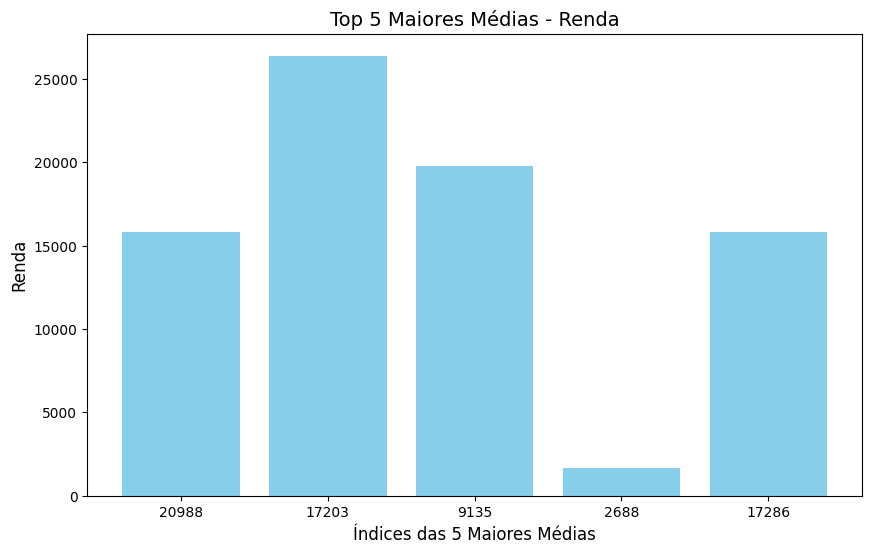

In [41]:
# Criar o gráfico de barras para a coluna 'Renda'
plt.figure(figsize=(10, 6))
plt.bar(top_5_medias_com_info.index.astype(str), top_5_medias_com_info['Renda'], color='skyblue')

# Adicionar título e rótulos
plt.title('Top 5 Maiores Médias - Renda', fontsize=14)
plt.xlabel('Índices das 5 Maiores Médias', fontsize=12)
plt.ylabel('Renda', fontsize=12)

# Exibir o gráfico
plt.show()

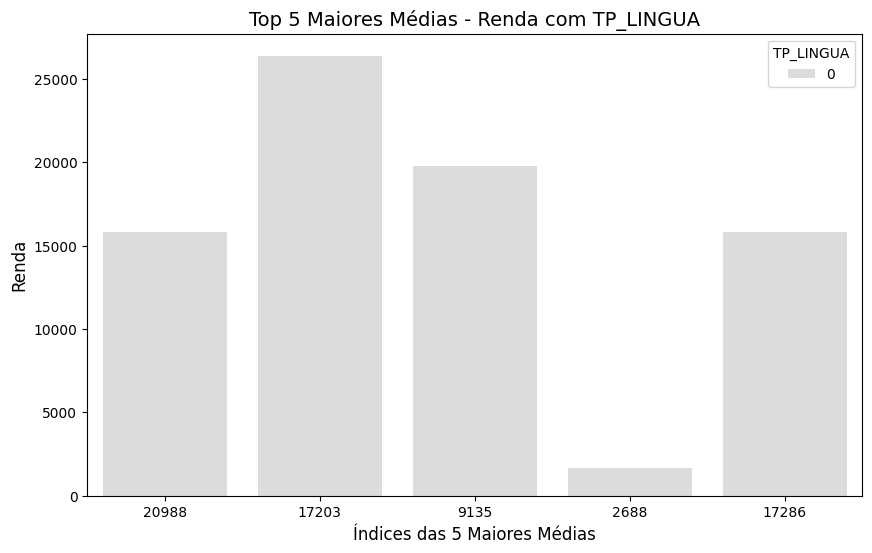

In [42]:
# Adicionar a variável 'TP_LINGUA' nas cores
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_medias_com_info.index.astype(str), y=top_5_medias_com_info['Renda'], hue=top_5_medias_com_info['TP_LINGUA'], palette='coolwarm')

# Adicionar título e rótulos
plt.title('Top 5 Maiores Médias - Renda com TP_LINGUA', fontsize=14)
plt.xlabel('Índices das 5 Maiores Médias', fontsize=12)
plt.ylabel('Renda', fontsize=12)

# Exibir o gráfico
plt.show()